In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neighbors import NearestNeighbors

In [2]:
iris_ds = pd.read_csv('iris.csv')


iris_ds.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
126,6.2,2.8,4.8,1.8,virginica
128,6.4,2.8,5.6,2.1,virginica
49,5.0,3.3,1.4,0.2,setosa
87,6.3,2.3,4.4,1.3,versicolor
99,5.7,2.8,4.1,1.3,versicolor


In [3]:
#lets take sepal length and width

data = iris_ds[['petal_length', 'petal_width']]

data.head()

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


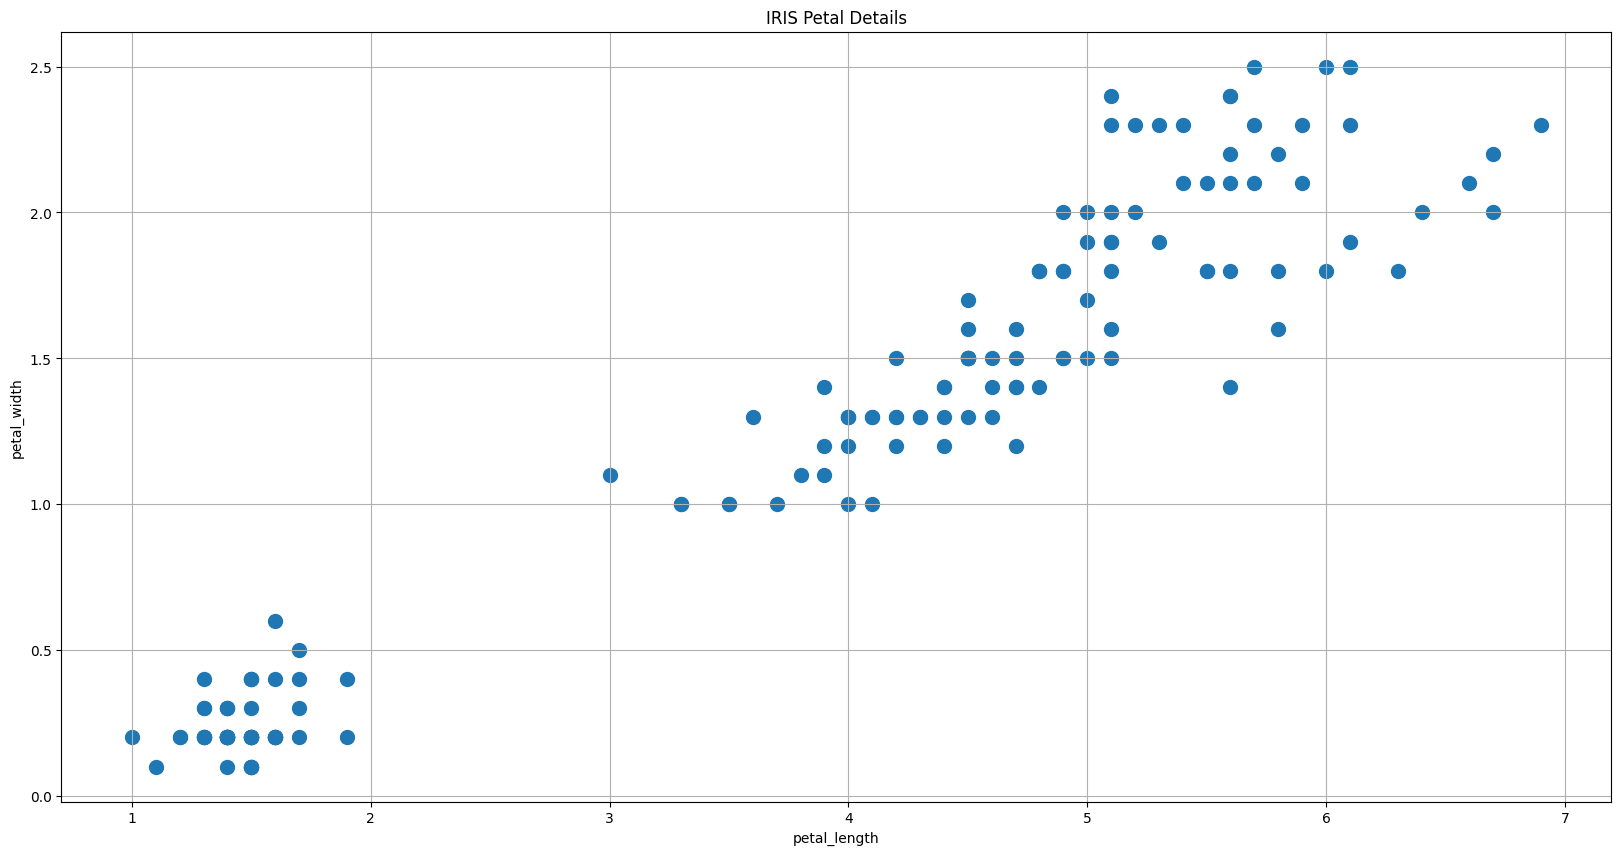

In [4]:
data_points = data.values
fig, ax = plt.subplots(figsize = (20, 10))

plt.scatter(data['petal_length'],
           data['petal_width'],
           s = 100)

ax.set(xlabel = 'petal_length',
      ylabel = 'petal_width',
      title = 'IRIS Petal Details')

ax.grid()
plt.show()

In [5]:
#Modelling
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=2)
nbrs.fit(data_points)

NearestNeighbors(n_neighbors=2)

In [6]:
#Anomoly Detection (getting distances based on n_neigbors=2)
distances, indexes = nbrs.kneighbors(data_points)


In [7]:
#marking points as outliers where mean distance is greater than 0.1
outlier_index = np.where(distances.mean(axis=1) > 0.1)

outlier_index

(array([ 64,  98, 107, 118, 131, 134], dtype=int64),)

In [8]:
#Remove Outliers
outlier_values = data.iloc[outlier_index]
outlier_values

,petal_length,petal_width
64,3.6,1.3
98,3.0,1.1
107,6.3,1.8
118,6.9,2.3
131,6.4,2.0
134,5.6,1.4


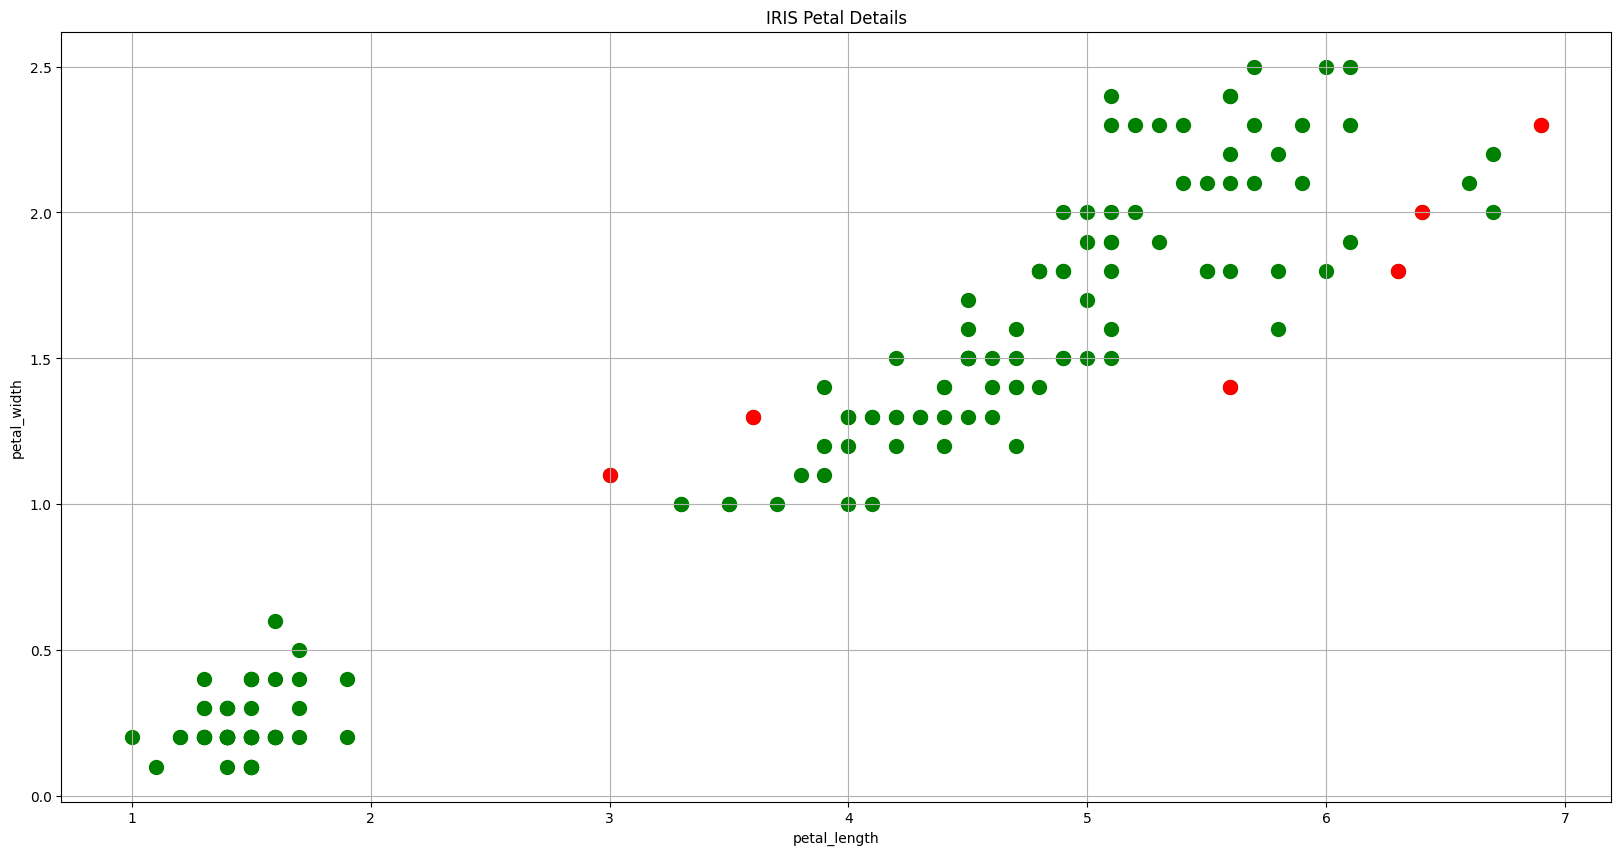

In [9]:
#Plotting Anomalies
fig, ax = plt.subplots(figsize = (20, 10))

plt.scatter(data['petal_length'],
           data['petal_width'],color = "g",
           s = 100)
plt.scatter(outlier_values['petal_length'],
           outlier_values['petal_width'],color = "r",
           s = 100)
ax.set(xlabel = 'petal_length',
      ylabel = 'petal_width',
      title = 'IRIS Petal Details')

ax.grid()
plt.show()